<a href="https://colab.research.google.com/github/dianakang/DIANA_Pandas/blob/master/Do_it_Pandas_8_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%9E%90%EB%A3%8C%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차

*   8.1. 자료형 다루기
   *   8.1.1. 자료형 변환하기 - astype 메서드 이용
   *   8.1.2. 잘못 입력한 데이터 처리하기 - to_numeric 메서드 이용

*   8.2. 카테고리 자료형
   *   8.2.1. 문자열을 카테고리 자료형으로 변환하기


---

# 8. 판다스 자료형

## 8.1. 자료형 다루기

### 8.1.1. 자료형 변환하기 - astype 메서드 이용

자료형 변환은 데이터 분석 과정에서 반드시 알아야 하는 요소 중 하나이다. 예를 들어 카테고리는 문자열로 변환해야 데이터 분석을 더 수월하게 할 수 있기 때문에 자주 변환하는 자료형이다. 또 다른 예는 전화번호이다. 전화번호는 보통 숫자로 저장한다. 하지만 전화번호로 평균을 구하거나 더하는 등의 계산은 거의 하지 않는다. 

오히려 문자열처럼 다루는 경우가 더 많다. 

그럼 이제 다음 실습을 통해 여러 가지 자료형을 문자열로 변환하는 방법에 대해 알아보자.

---

이번에 사용할 데이터 집합은 seaborn 라이브러리의 tips 데이터 집합이다. 

In [1]:
# 데이터 불러오기 
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

**자료형을 변환**하려면 **astype 메서드**를 사용하면 된다. 다음은 astype 메서드를 사용해 sex 열의 데이터를 문자열로 변환하여 sex_str이라는 새로운 열에 저장한 것이다. 

In [4]:
# sex 열의 데이터를 문자열로 변환
tips['sex_str'] = tips['sex'].astype(str)
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

-> sex_str의 자료형을 출력해보니 object(문자열)로 잘 바뀌어 있다는 것을 확인할 수 있다. 

In [5]:
# total_bill 열의 데이터를 문자열로 변환
tips['total_bill'] = tips['total_bill'].astype(str)
tips.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [6]:
 # 문자열로 변환했던 total_bill 열을 다시 실수(float)로 변환
 tips['total_bill'] = tips['total_bill'].astype(float)
 tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

### 8.1.2. 잘못 입력한 데이터 처리하기 -  to_numeric 메서드 이용

**이번에는 잘못 입력한 데이터를 변환하는 방법**에 대해 알아보자. 만약 정수가 있어야 하는 열에 문자열이 입력되어 있으면 어떻게 해야할까? 

이런 문제를 해결하는 방법과 자료형을 변환하는 **to_numeric 메서드**도 함께 알아보자.

---
다음은 total_bill 열의 1,3,5,7 행의 데이터를 'missing'으로 바꿔 변수 tips_sub_miss에 저장한 것이다.

(데이터의 훼손을 피하기 위해 새로운 변수에 데이터프레임을 저장했다.)




*   loc속성
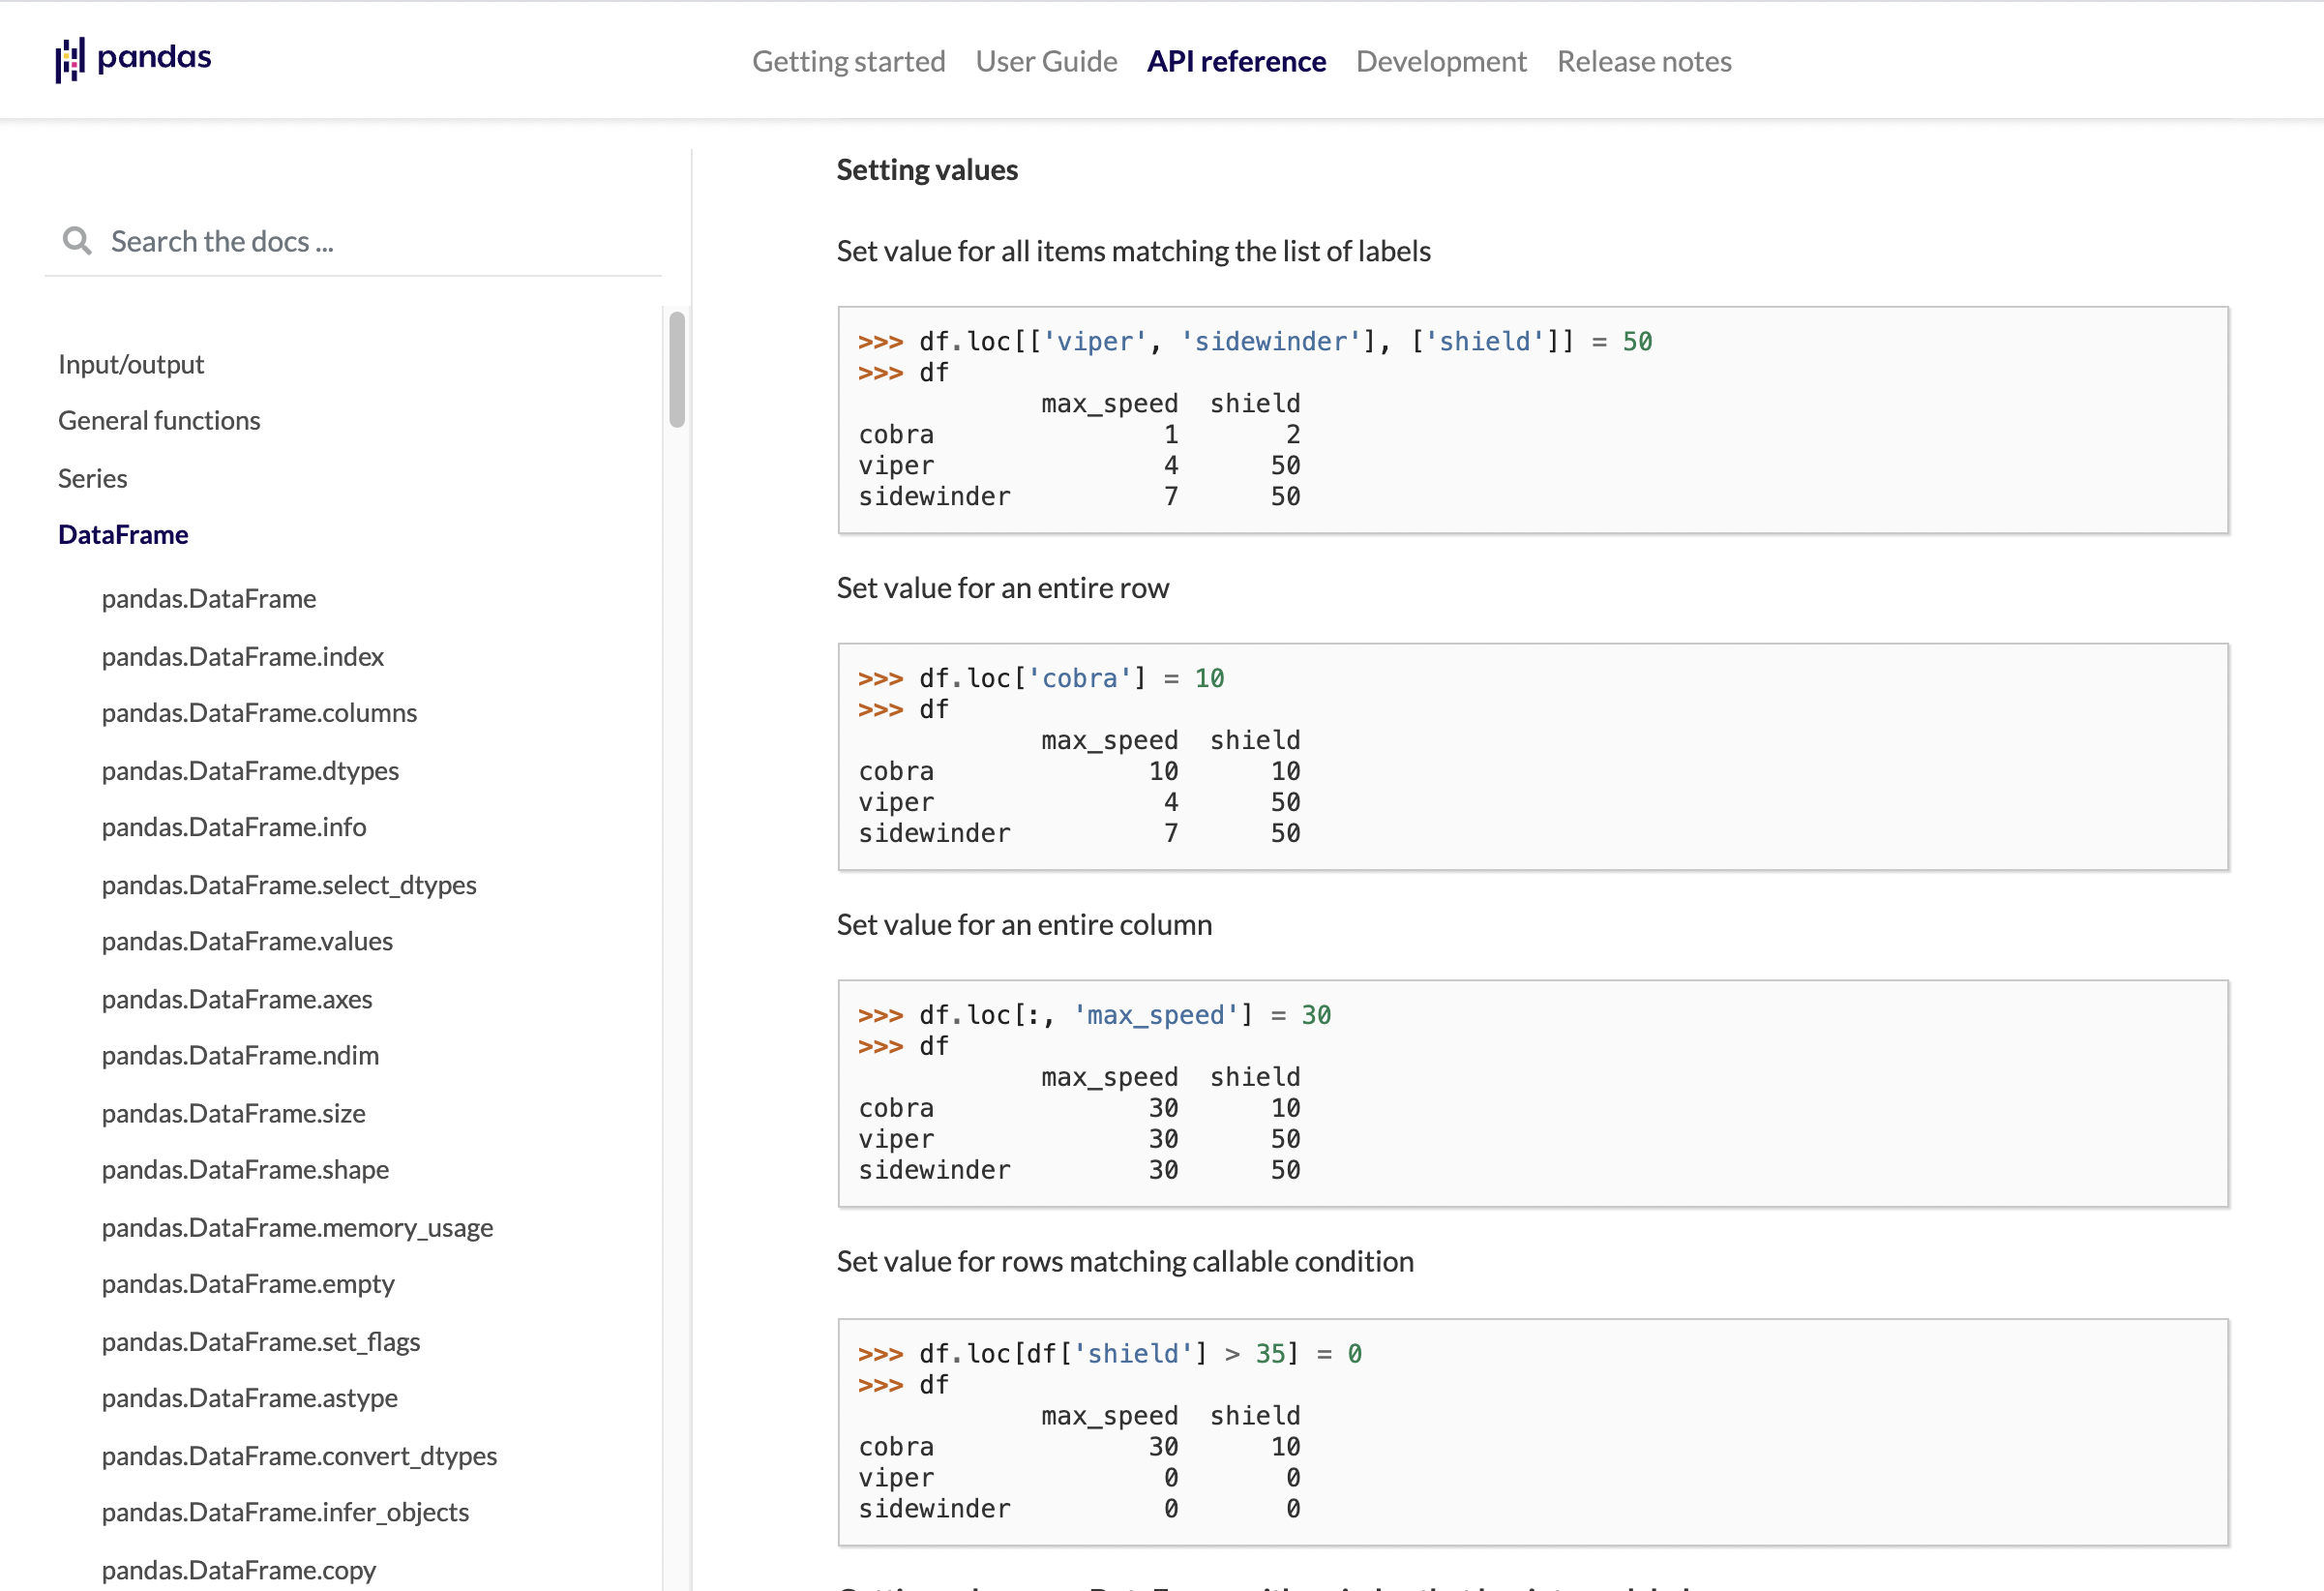



(출처: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

In [7]:
tips_sub_miss = tips.head(10)
tips_sub_miss.loc[[1,3,5,7], 'total_bill'] = 'missing'
tips_sub_miss

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,missing,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,missing,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


데이터프레임의 자료형을 확인해보면 total_bill 열이 실수가 아니라 문자열임을 알 수 있다.

'missing'이라는 문자열 때문에 이런 문제가 발생한 것이다.

In [8]:
# tips_sub_miss 데이터프레임의 자료형 확인 -> total_bill : object(문자열)
tips_sub_miss.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

astype 메서드를 사용하면 이 문제를 해결할 수 있을까? astype 메서드를 사용해 total_bill 열의 데이터를 실수로 변환하려 하면 오류가 발생한다. 

판다스는 'missing'이라는 문자열을 실수로 변환하는 방법을 모르기 때문이다.

In [10]:
# total_bill 열 자료형 '실수(float)'로 변환 시도
# tips_sub_miss['total_bill'].astype(float) -> 오류 출력

그러면 다른 방법을 사용해야 한다. 이번에는 to_numeric 메서드를 사용해보겠다. 

그런데 to_numeric 메서드를 사용해도 비슷한 오류가 발생한다.

In [12]:
# to_numeric 메서드 이용하여 자료형 변환 시도
# pd.to_numeric(tips_sub_miss['total_bill']) -> 오류 출력

사실 to_numeric 메서드를 사용해도 문자열을 실수로 변환할 수는 없다. 하지만 to_numeric 메서드는 errors 인자에 raise, coerce, ignore을 지정하여 오류를 어느 정도 제어할 수 있다.



예를 들어 errors 인자를 raise로 설정하면 숫자로 변환할 수 없는 값이 있을 때만 오류가 발생한다.

이런 오류는 분석가가 의도한 오류이므로 오류가 발생한 지점을 정확히 알 수 있어 유용하다. 

errors 인자에 설정할 수 있는 값은 다음과 같다. 

(참고로 errors 인자의 기본 설정값은 raise이다.)

---

- **errors 인자에 설정할 수 있는 값**

  *   raise : 숫자로 변환할 수 없는 값이 있으면 오류 발생
  *   coerce: 숫자로 변환할 수 없는 값을 누락값으로 지정
  *   ignore: 아무 작업도 하지 않음



---

errors 인자를 ignore로 설정하면 오류가 발생하지 않지만 자료형도 변하지 않는다.

말 그대로 오류를 무시하는 것이다. total_bill은 여전히 문자열(object)이다.


In [13]:
# 자료형 변환 시도 - erros 인자로 'ignore' 설정 => 자료형 : 문자열
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='ignore')
tips_sub_miss.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

이번에는 errors 인자를 coerce로 설정해보겠다. 그러면 'missing'이 누락값(NaN)으로 바뀐다. 

dtypes으로 데이터프레임의 자료형을 확인해보면, total_bill의 자료형이 실수(float)로 바뀌었다.

In [14]:
# 자료형 변환 시도 - erros 인자로 'coerce' 설정 => 자료형 : 실수로 변환
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce')
tips_sub_miss.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

to_numeric 메서드에는 errors 인자 외에도 downcast 인자가 있다. **downcast(다운캐스트)는 정수, 실수와 같은 자료형을 더 작은 형태로 만들 때 사용**한다. 

downcast 인자에는 integer, signed, unsigned, float 등의 값을 사용할 수 있다.

---

다음은 total_bill 열을 다운캐스트한 것이다. 그러면 total_bill 열의 자료형이 float64에서 float32로 바뀐 것을 알 수 있다. 

float64는 float32보다 더 많은 범위의 실수를 표현할 수 있지만, 메모리 공간을 2배나 차지한다. 

만약 저장하는 실수의 예상 범위가 크지 않다면 다운캐스트하는 것이 좋다.


In [15]:
#  데이터프레임의 자료형 확인 -> total_bill의 자료형이 다운캐스트되어 float64 > float32으로 바뀌었음.
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce', downcast='float')
tips_sub_miss.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


total_bill     float32
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

## 8.2. 카테고리 자료형

판다스 라이브러리는 **유한한 범위의 값만을 가질 수 있는 카테고리라는 특수한 자료형**이 있다.

먄약 10종류의 과일 이름을 저장한 열이 있다고 가정할 경우 문자열 자료형보다 카테고리 자료형을 사용하는 것이 용량과 속도 면에서 더 효율적이다. 

카테고리 자료형의 장점과 특징은 다음과 같다.

*   카테고리 자료형의 장점과 특징

  *   용량과 속도 면에서 매우 효율적이다.
  *   주로 동일한 문자열이 반복되어 데이터를 구성하는 경우에 사용한다.

### 8.2.1. 문자열을 카테고리 자료형으로 변환하기

sex 열의 데이터는 남자 또는 여자로만 구성되어 있다. 그래서 카테고리 자료형으로 저장되어 있다.

만약 sex 열의 자료형을 문자열로 변환하면 어떻게 될까? 

sex 열의 자료형을 문자열로 변환한 다음 데이터프레임의 용량을 info 메서드로 확인하면, 데이터프레임의 용량이 10.7 KB 정도라는 것을 확인할 수 있다.

In [21]:
# sex 열의 자료형을 문자열로 변환
tips['sex'] = tips['sex'].astype('str')  ## 데이터프레임이 아닌 시리즈이기 때문에 dtypes메서드가 아닌 astype메서드를 사용
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    object  
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 10.7+ KB


sex 열을 다시 카테고리로 변환하면 어떻게 될까? 

info 메서드로 데이터프레임의 용량을 확인해보면 데이터프레임의 용량이 10.7+KB에서 9.1+KB로 줄어든 것을 알 수 있다. 

이와 같이 반복되는 문자열로 구성된 데이터는 카테고리를 사용하는 것이 더 효율적이다.

In [22]:
# sex 열의 자료형을 다시 카테고리로 변환
tips['sex'] = tips['sex'].astype('category')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.2+ KB




---



---

이번 8장에서는 자료형을 다루는 방법에 대해 알아보았다. 특히 카테고리라는 자료형을 새롭게 살펴보았다.

카테고리는 데이터의 크기가 커질수록 진가를 발휘하는 자료형이기 때문에 반드시 알아두어야 한다!
